In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df = pd.read_csv("Happiness-WVS-vs-Gallup.csv", low_memory=False)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55734 entries, 0 to 55733
Data columns (total 7 columns):
 #   Column                                                             Non-Null Count  Dtype  
---  ------                                                             --------------  -----  
 0   Entity                                                             55734 non-null  object 
 1   Code                                                               54104 non-null  object 
 2   Year                                                               55734 non-null  int64  
 3   Share of people who are happy (World Value Survey 2014)            237 non-null    float64
 4   Life satisfaction in Cantril Ladder (World Happiness Report 2022)  2244 non-null   float64
 5   Population (historical estimates)                                  55656 non-null  float64
 6   Continent                                                          285 non-null    object 
dtypes: float64(3), int64(1)

In [20]:
df.rename(columns = {
    "Life satisfaction in Cantril Ladder (World Happiness Report 2022)": "life_satisfaction",
    "Share of people who are happy (World Value Survey 2014)": "happiness"
    }, 
    inplace=True
    )

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,55734.0,1.604449e+03,1.415694e+03,-10000.000000,1832.000000,1.899000e+03,1.964000e+03,2.021000e+03
happiness,237.0,8.014566e+01,1.310589e+01,29.678267,74.691948,8.314239e+01,9.043877e+01,9.811321e+01
life_satisfaction,2244.0,5.476749e+00,1.110964e+00,2.375092,4.653463,5.407268e+00,6.289984e+00,8.018934e+00
Population (historical estimates),55656.0,3.246352e+07,2.503028e+08,1.000000,133874.000000,1.218570e+06,5.396250e+06,7.874966e+09


In [23]:
df.head()

,Entity,Code,Year,happiness,life_satisfaction,Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2006,NaN,3.723590,26433058.0,NaN
2,Afghanistan,AFG,2007,NaN,4.401778,27100542.0,NaN
3,Afghanistan,AFG,2008,NaN,4.758381,27722281.0,NaN
4,Afghanistan,AFG,2009,NaN,3.831719,28394806.0,NaN


In [24]:
df.groupby("Entity").describe()

Year                                             \
                       count         mean          std      min     25%   
Entity                                                                    
Abkhazia                 1.0  2015.000000          NaN   2015.0  2015.0   
Afghanistan            259.0  1545.100386  1554.329654 -10000.0  1827.5   
Africa                 259.0  1545.100386  1554.329654 -10000.0  1827.5   
Akrotiri and Dhekelia    1.0  2015.000000          NaN   2015.0  2015.0   
Albania                259.0  1545.100386  1554.329654 -10000.0  1827.5   
...                      ...          ...          ...      ...     ...   
Yugoslavia               1.0  2015.000000          NaN   2015.0  2015.0   
Zambia                 259.0  1545.100386  1554.329654 -10000.0  1827.5   
Zanzibar                 1.0  2015.000000          NaN   2015.0  2015.0   
Zimbabwe               259.0  1545.100386  1554.329654 -10000.0  1827.5   
Åland Islands            1.0  2015.000000          NaN   2015.0  2015.0   

                                              happiness             ...  \
                          50%     75%     max     count       mean  ...   
Entity                                                              ...   
Abkhazia               2015.0  2015.0  2015.0       0.0        NaN  ...   
Afghanistan            1892.0  1956.5  2021.0       0.0        NaN  ...   
Africa                 1892.0  1956.5  2021.0       0.0        NaN  ...   
Akrotiri and Dhekelia  2015.0  2015.0  2015.0       0.0        NaN  ...   
Albania                1892.0  1956.5  2021.0       2.0  46.116716  ...   
...                       ...     ...     ...       ...        ...  ...   
Yugoslavia             2015.0  2015.0  2015.0       0.0        NaN  ...   
Zambia                 1892.0  1956.5  2021.0       1.0  52.474575  ...   
Zanzibar               2015.0  2015.0  2015.0       0.0        NaN  ...   
Zimbabwe               1892.0  1956.5  2021.0       2.0  69.260278  ...   
Åland Islands          2015.0  2015.0  2015.0       0.0        NaN  ...   

                      life_satisfaction            \
                                    75%       max   
Entity                                              
Abkhazia                            NaN       NaN   
Afghanistan                    3.945071  4.758381   
Africa                              NaN       NaN   
Akrotiri and Dhekelia               NaN       NaN   
Albania                        5.316923  5.867422   
...                                 ...       ...   
Yugoslavia                          NaN       NaN   
Zambia                         4.882152  5.260361   
Zanzibar                            NaN       NaN   
Zimbabwe                       4.184451  4.955101   
Åland Islands                       NaN       NaN   

                      Population (historical estimates)                \
                                                  count          mean   
Entity                                                                  
Abkhazia                                            0.0           NaN   
Afghanistan                                       259.0  8.001861e+06   
Africa                                            259.0  2.560308e+08   
Akrotiri and Dhekelia                               0.0           NaN   
Albania                                           259.0  1.137164e+06   
...                                                 ...           ...   
Yugoslavia                                          0.0           NaN   
Zambia                                            259.0  3.116825e+06   
Zanzibar                                            0.0           NaN   
Zimbabwe                                          259.0  3.128272e+06   
Åland Islands                                       0.0           NaN   

                                                                        \
                                std       min         25%          50%   
Entity  

In [25]:
# df["life_satisfaction"] = df["life_satisfaction"].replace(np.nan, 0)
dataset_greece = df.loc[df["Entity"] == "Greece"]
dataset_mexico = df.loc[df["Entity"] == "Mexico"]

In [33]:
dataset_mexico.sort_values(by="Year", ascending=False).head(30)

,Entity,Code,Year,happiness,life_satisfaction,Population (historical estimates),Continent
31334,Mexico,MEX,2021,NaN,NaN,130262220.0,NaN
31096,Mexico,MEX,2020,NaN,6.127600,128932753.0,NaN
31095,Mexico,MEX,2019,NaN,6.316800,127575529.0,NaN
31094,Mexico,MEX,2018,NaN,5.964221,126190782.0,NaN
31093,Mexico,MEX,2017,NaN,6.431945,124777326.0,NaN
31092,Mexico,MEX,2016,NaN,6.549579,123333379.0,NaN
31091,Mexico,MEX,2015,NaN,6.410299,121858251.0,North America
31081,Mexico,MEX,2014,94.250000,6.824173,120355137.0,NaN
31090,Mexico,MEX,2013,NaN,6.236287,118827158.0,NaN
31089,Mexico,MEX,2012,NaN,6.679831,117274156.0,NaN


In [37]:
dataset_mexico.head(50)

,Entity,Code,Year,happiness,life_satisfaction,Population (historical estimates),Continent
31076,Mexico,MEX,1984,80.677399,NaN,74352631.0,NaN
31077,Mexico,MEX,1993,68.543045,NaN,88625440.0,NaN
31078,Mexico,MEX,1998,66.116753,NaN,96056313.0,NaN
31079,Mexico,MEX,2004,91.661240,NaN,104514934.0,NaN
31080,Mexico,MEX,2009,90.932480,6.909515,112463886.0,NaN
31081,Mexico,MEX,2014,94.250000,6.824173,120355137.0,NaN
31082,Mexico,MEX,2003,NaN,6.580658,103081020.0,NaN
31083,Mexico,MEX,2005,NaN,6.525378,106005199.0,NaN
31084,Mexico,MEX,2006,NaN,6.829036,107560155.0,NaN
31085,Mexico,MEX,2007,NaN,6.962819,109170503.0,NaN


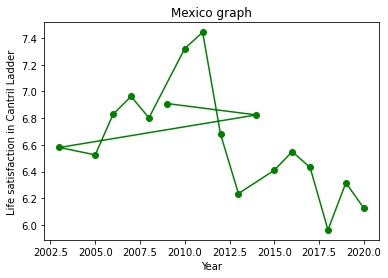

In [36]:
plt_df = dataset_mexico.dropna()
plt.title("Mexico graph")
plt.xlabel("Year")
plt.ylabel("Life satisfaction in Cantril Ladder")
#plt.plot(
    #dataset_greece["Year"],
    #dataset_greece["satisfaction"],
    #marker='o'
    #linestyle = 'dotted'
#)
plt.plot(
    dataset_mexico["Year"],
    dataset_mexico["life_satisfaction"],
    marker='o',
    color="green"
    #linestyle = 'dotted'
)
plt.show()